In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
################### polynomial
N = 24;
xy = np.zeros((2, N))
xy[0, :] = np.linspace(-6, 10, N) + np.random.uniform(-0.3, 0.3, N)  # non-uniform sampling
xy[1, :] = 0.1 * xy[0, :] ** 4 - 0.6*xy[0, :] ** 3 - 4*xy[0, :] ** 2 + 6*xy[0, :] - 2 + np.random.uniform(-10, 20, N)
data.append(xy)

################### wavey
N = 40;
xy = np.zeros((2, N))
xy[0, :] = np.linspace(0, 45, N) + np.random.uniform(-0.3, 0.3, N)  # non-uniform sampling
xy[1, :] = 2 * np.cos(0.2*xy[0, :])**2 + 1 * np.sin(xy[0, :]+0.1) + np.random.uniform(-0.1, 0.1, N)
data.append(xy)

################### 3D
def f3d(x, y):
    return 1.4 * np.sin(0.2*x-1.2) ** 2 + np.cos(0.9*y+1.4) ** 2

N = 120;
xy = np.zeros((3, N))
xy[0, :] = np.random.uniform(-4, 6, N)
xy[1, :] = np.random.uniform(-2, 3.7, N)
xy[2, :] = f3d(xy[0, :], xy[1, :])
data.append(xy)

np.savez('lab10_dataset', **{f'data_{i}': d for i, d in enumerate(data)})

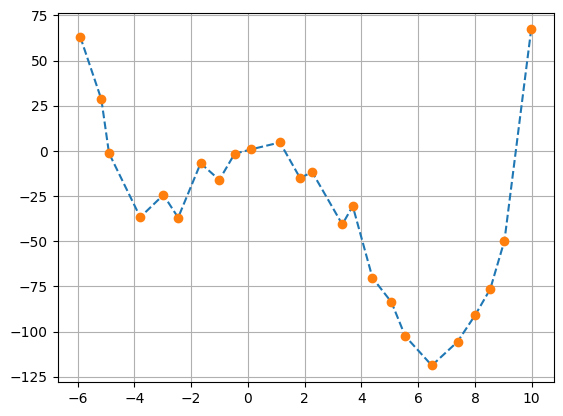

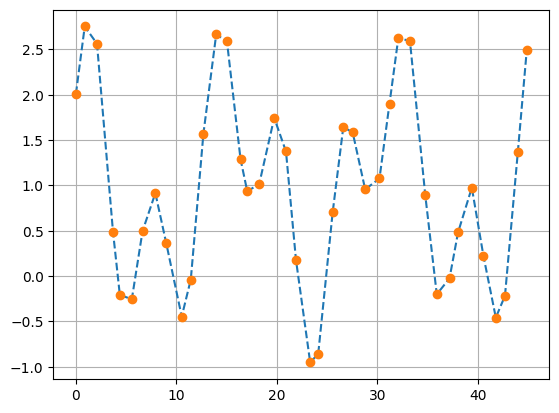

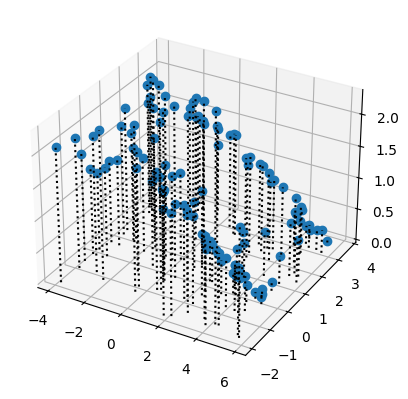

In [3]:
for sp_i, xy in enumerate(data, 1):
    plt.figure()
    if xy.shape[0] == 2:
        plt.plot(xy[0, :], xy[1, :], '--')
        plt.plot(xy[0, :], xy[1, :], 'o')
        plt.grid()
    elif xy.shape[0] == 3:
        ax = plt.subplot(1, 1, 1, projection='3d')
        markerline, stemlines, baseline = ax.stem(xy[0], xy[1], xy[2], linefmt='k:')
        baseline.remove()
    else:
        plt.text(f'too many dimensions: {xy.shape[0]}')

In [4]:
dataset = np.load('lab10_dataset.npz')
print(dataset)

NpzFile 'lab10_dataset.npz' with keys: data_0, data_1, data_2


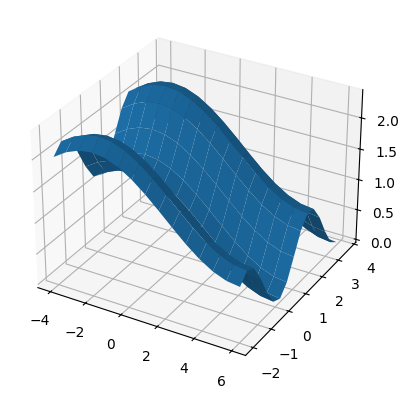

In [5]:
N = 15
M = 16
X, Y = np.meshgrid(
    np.linspace(-4, 6, N),
    np.linspace(-2, 3.7, M)
)
Z = f3d(X, Y)

ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z)
